In [1]:
import pandas as pd

df ={'animal' : [1, 1, 1, 1, 1, 1, 1, 2, 2],
     'x':[76.551, 77.529, 78.336,77, 78.02, 79.23, 77.733, 79.249,  76.077],
     'y': [151.933, 152.945, 153.970, 119.369, 120.615, 118.935, 119.115, 152.004, 153.027],
    'time': [0, 1, 2, 0, 3,2,5, 0, 1]}
df = pd.DataFrame(df)

# get distance travelled between points
def get_diff(df):
    dx = (df['x'] - df.groupby('animal')['x'].shift(1))
    dy = (df['y'] - df.groupby('animal')['y'].shift(1))
    df['distance'] = (dx**2 + dy**2)**0.5
    return df

# get the start coordinates
def get_startend(df):
    for i in range(len(df)):
        df.loc[df['distance'] > 5, 'position'] = 'start'
        df.loc[df['distance'].isnull(), 'position'] = 'start'
    cond = df['position'].shift(-1).str.contains('start').fillna(False)
    df.loc[cond, 'position'] = 'end'
    df['position'].iloc[-1] = 'end'
    return df


In [2]:
df = get_diff(df)
df


,animal,x,y,time,distance
0,1,76.551,151.933,0,NaN
1,1,77.529,152.945,1,1.407348
2,1,78.336,153.970,2,1.304559
3,1,77.000,119.369,0,34.626783
4,1,78.020,120.615,3,1.610253
5,1,79.230,118.935,2,2.070386
6,1,77.733,119.115,5,1.507783
7,2,79.249,152.004,0,NaN
8,2,76.077,153.027,1,3.332884


In [3]:
df = get_startend(df)
df

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_69445/1069424760.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[-1] = 'end'


,animal,x,y,time,distance,position
0,1,76.551,151.933,0,NaN,start
1,1,77.529,152.945,1,1.407348,NaN
2,1,78.336,153.970,2,1.304559,end
3,1,77.000,119.369,0,34.626783,start
4,1,78.020,120.615,3,1.610253,NaN
5,1,79.230,118.935,2,2.070386,NaN
6,1,77.733,119.115,5,1.507783,end
7,2,79.249,152.004,0,NaN,start
8,2,76.077,153.027,1,3.332884,end


In [10]:
x_start, y_start = out.loc[out['position'] == 'start', ['x', 'y']].values.T.tolist()
x_end, y_end = out.loc[out['position'] == 'end', ['x', 'y']].values.T.tolist()

In [ ]:
x_start

In [ ]:
y_start

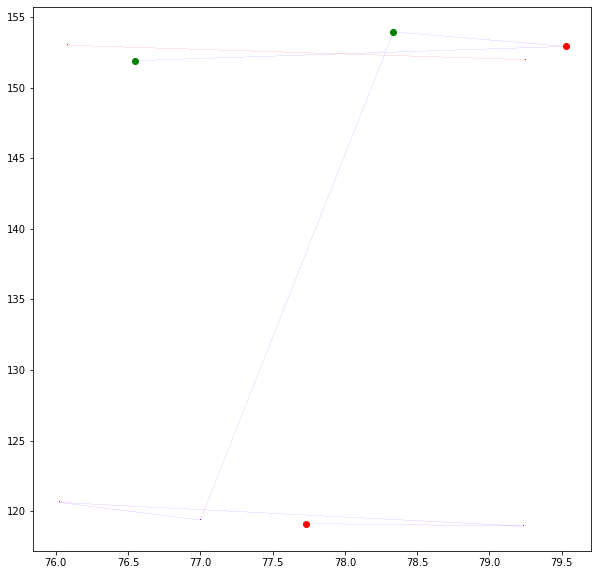

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap = cm.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, df['ID'].nunique()))
color_map = dict(zip(df['ID'].unique(), colors))

# fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
for animal, subdf in df.groupby('ID'):
    plt.plot(subdf['x'], subdf['y'], marker=',', label=None, c=color_map[animal], linewidth=0.1)
# ax.legend()

plt.plot(x_start, y_start, 'og')
plt.plot(x_end, y_end, 'or')
plt.show()

In [5]:
import pandas as pd

df ={'ID' : [1, 1, 1, 1, 1, 1, 1, 2, 2],
     'x':[76.551, 79.529, 78.336,77, 76.02, 79.23, 77.733, 79.249,  76.077],
     'y': [151.933, 152.945, 153.970, 119.369, 120.615, 118.935, 119.115, 152.004, 153.027],
    'position': ['start', 'end', 'start', 'NA', 'NA','NA','end', 'start', 'end']}
df = pd.DataFrame(df)

In [7]:
print(df)

   ID       x        y position
0   1  76.551  151.933    start
1   1  79.529  152.945      end
2   1  78.336  153.970    start
3   1  77.000  119.369       NA
4   1  76.020  120.615       NA
5   1  79.230  118.935       NA
6   1  77.733  119.115      end
7   2  79.249  152.004    start
8   2  76.077  153.027      end


In [8]:
m = (df['position'] == 'end') & (df['x'] > 75) & (df['x'] < 77)
out = df[~m.groupby(df['position'].eq('start').cumsum()).transform('max')]
print(out)

   ID       x        y position
0   1  76.551  151.933    start
1   1  79.529  152.945      end
2   1  78.336  153.970    start
3   1  77.000  119.369       NA
4   1  76.020  120.615       NA
5   1  79.230  118.935       NA
6   1  77.733  119.115      end


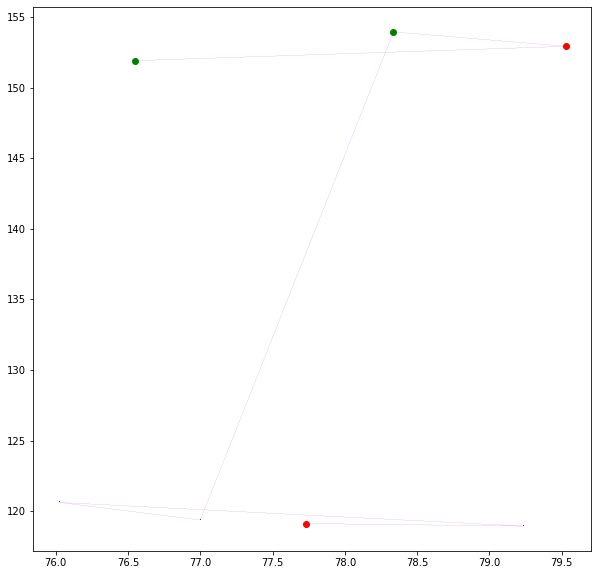

In [16]:
cmap = cm.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, out['ID'].nunique()))
color_map = dict(zip(df['ID'].unique(), colors))

# fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
for animal, subdf in out.groupby('ID'):
    plt.plot(subdf['x'], subdf['y'], marker=',', label=None, c=color_map[animal], linewidth=0.1)
# ax.legend()

plt.plot(x_start, y_start, 'og')
plt.plot(x_end, y_end, 'or')
plt.show()